# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

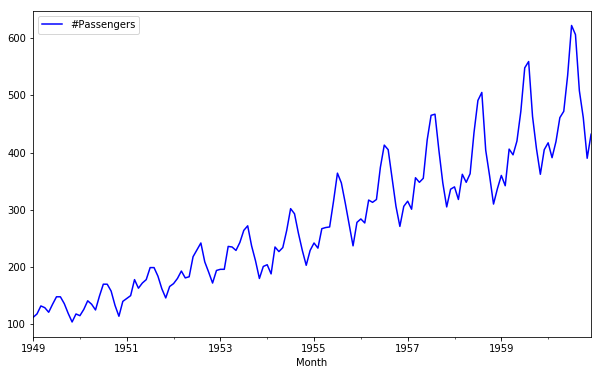

In [1]:
# Import necessary libraries
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Import passengers.csv and set it as a time-series object. Plot the TS
data = pd.read_csv('passengers.csv')
ts = data.set_index('Month')
ts.index = pd.to_datetime(ts.index)

ts.plot(figsize=(10, 6), color="blue");

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [2]:
from statsmodels.tsa.stattools import adfuller
    
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def stationarity_check(TS, col_name):
    
    # Rolling Statistics
    rolmean = TS.rolling(window=8, center=False).mean()
    rolstd = TS.rolling(window=8, center=False).std()
    
    # Dickey Fuller Test
    dftest = adfuller(TS[col_name]) 
    
    # Plot
    fig = plt.figure(figsize=(10, 6))
    orig = plt.plot(TS, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print 
    print ('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

Use your newly created function on the airpassenger data set.

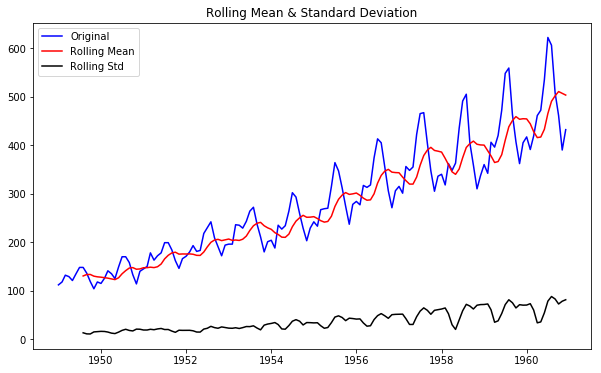

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [3]:
# Code here
stationarity_check(ts, '#Passengers')

## Perform a log() and sqrt() transform

LOG TRANSFORMATION


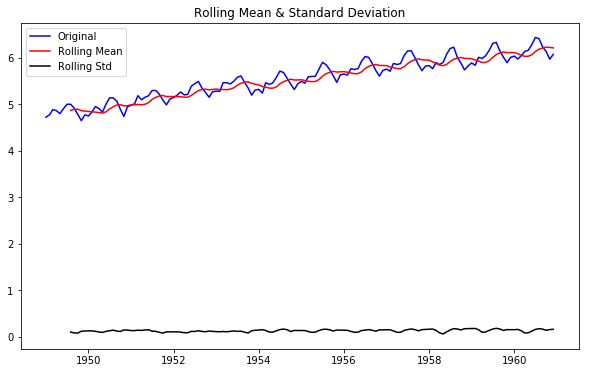

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [5]:
# Log transform timeseries and compare with original to check the effect
ts_log = np.log(ts)

print('LOG TRANSFORMATION:')
stationarity_check(ts_log, '#Passengers')

SQRT TRANSFORMATION:


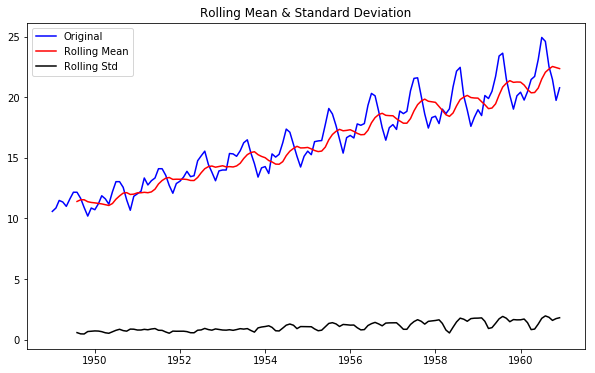

Results of Dickey-Fuller Test:
Test Statistic                  -0.345854
p-value                          0.918754
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [7]:
ts_sqrt = np.sqrt(ts)

print('SQRT TRANSFORMATION:')
stationarity_check(ts_sqrt, '#Passengers')

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

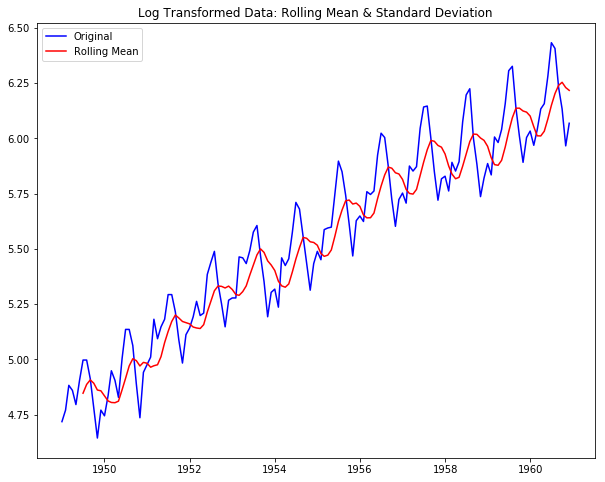

In [8]:
# your code here
rolmean = np.log(ts).rolling(window=7).mean()
fig = plt.figure(figsize=(10, 8))
orig = plt.plot(np.log(ts), color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Log Transformed Data: Rolling Mean & Standard Deviation')
plt.show(block=False)

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [9]:
# Subtract the moving average from the original data and check head for Nans
logts_minus_rolmean = np.log(ts) - rolmean
logts_minus_rolmean.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404


In [11]:
# Drop the NaN values from timeseries calculated above
logts_minus_rolmean.dropna(inplace=True)

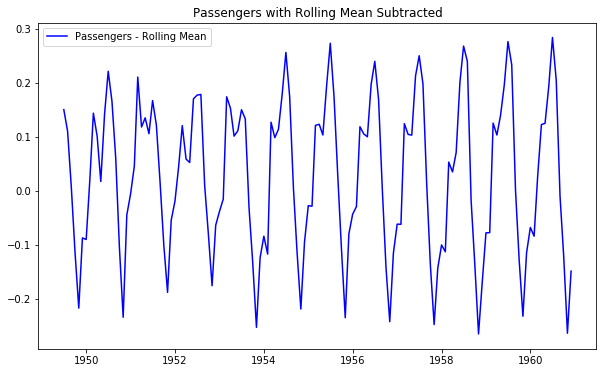

In [12]:
# Plot the result
fig = plt.figure(figsize=(10, 6))
plt.plot(logts_minus_rolmean, color='blue', label='Passengers - Rolling Mean')
plt.title('Passengers with Rolling Mean Subtracted')
plt.legend(loc='best')
plt.show(block=False)

Finally, use your function `check_stationarity` to see if this series is considered stationary!

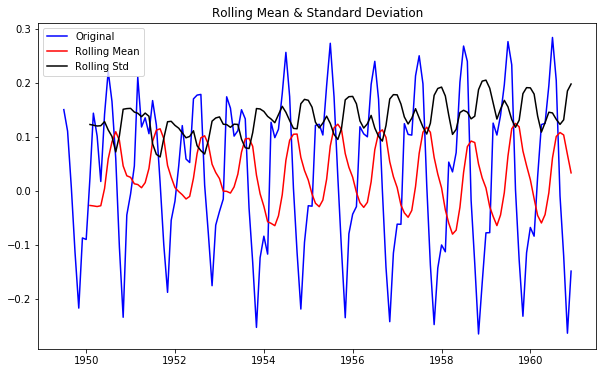

Results of Dickey-Fuller Test:
Test Statistic                  -2.348027
p-value                          0.156946
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


In [14]:
# Your code here
stationarity_check(logts_minus_rolmean, '#Passengers')

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [ ]:
# Your conclusion here
# The time series of number of passengers is not stationary.
# The p-value is 0.15, above the critical threshold of 0.05.
# The Null Hypothesis that the time series is not stationary fails to be rejected.

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

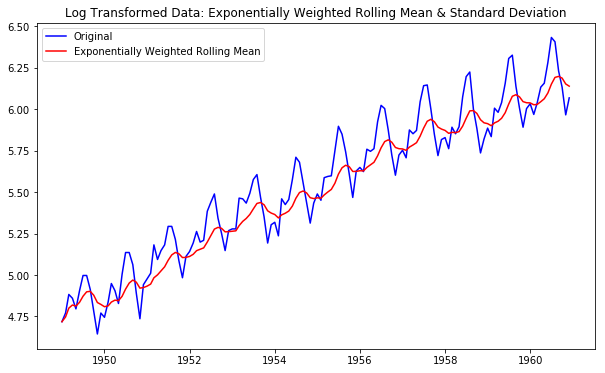

In [15]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolmean = np.log(ts).ewm(halflife=4).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(10, 6))
orig = plt.plot(np.log(ts), color='blue', label='Original')
mean = plt.plot(exp_rolmean, color='red', label='Exponentially Weighted Rolling Mean')
plt.title('Log Transformed Data: Exponentially Weighted Rolling Mean & Standard Deviation')
plt.legend(loc='best')
plt.show(block=False)

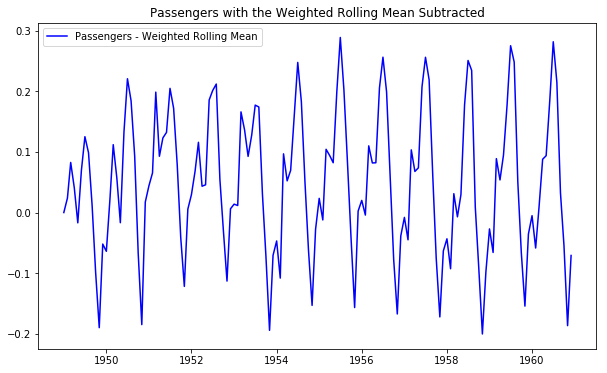

In [17]:
# Subtract the moving average from the original data and plot
logts_minus_exp_rolmean = np.log(ts) - exp_rolmean
logts_minus_exp_rolmean.head(15)

fig = plt.figure(figsize=(10, 6))
plt.plot(logts_minus_exp_rolmean, color='blue', label='Passengers - Weighted Rolling Mean')
plt.title('Passengers with the Weighted Rolling Mean Subtracted')
plt.legend(loc='best')
plt.show(block=False)

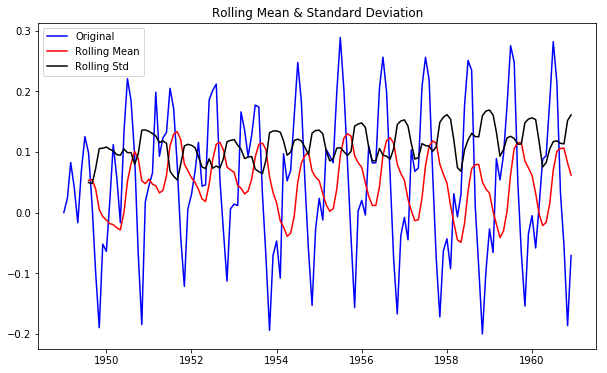

Results of Dickey-Fuller Test:
Test Statistic                  -3.297250
p-value                          0.015002
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [18]:
# do a stationarity check
stationarity_check(logts_minus_exp_rolmean, '#Passengers')

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [ ]:
# Your conclusion here
# The p-value of the Dickey-Fuller test is below the critical threshold value of 0.05.
# The Null Hypothesis that the time series for number of passengers is not stationary may be rejected.
# The time series is stationary according to the test.

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [22]:
# difference your data and look at the head
logts_diff = logts_minus_exp_rolmean.diff(periods=12)
logts_diff.head(15)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


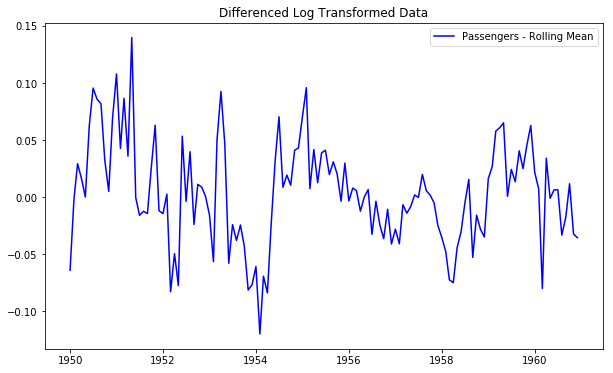

In [23]:
# plot your differenced time series
fig = plt.figure(figsize=(10, 6))
plt.plot(logts_diff, color='blue', label='Passengers - Rolling Mean')
plt.title('Differenced Log Transformed Data')
plt.legend(loc='best')
plt.show(block=False)

In [27]:
# drop nas
logts_diff.dropna(inplace=True)

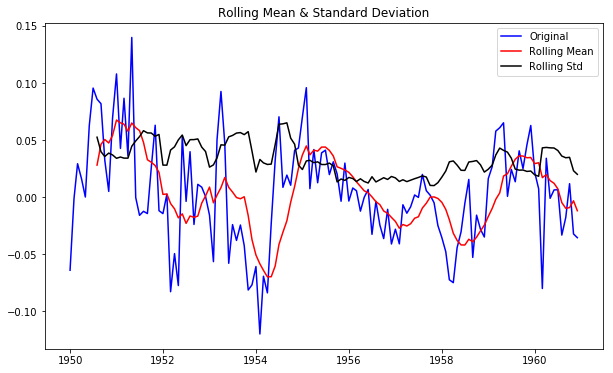

Results of Dickey-Fuller Test:
Test Statistic                  -3.601666
p-value                          0.005729
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [29]:
# perform the stationarity check
stationarity_check(logts_diff, '#Passengers')

### Your conclusion

In [ ]:
# Your conclusion here
# Although the differenced log transformed time series has moving average and moving standard deviation lines that fluctuate,
# the Dickey-Fuller test concludes that number of passengers time series is stationary, with a p-value of 0.006.

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.